In [1]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import matplotlib.pyplot as plt
import os
import pickle
import random 
import operator
import math
import numpy as np
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
from scipy.fft import fft, ifft
from collections import Counter
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
pd.options.display.max_columns = 999


os.chdir(r'C:\Users\Sofus\Dropbox\PhD\ML\BigProjectGithub\music\wav')

def chunk_using_generators(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def zerocrossing(x):
    n0 = 0
    n1 = 9100
    zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
    #print(sum(zero_crossings))
    return sum(zero_crossings)

def spectral_rolloff(x):
    spectral_rolloff1 = librosa.feature.spectral_rolloff(x+0.01, sr=sr)
    return np.mean(spectral_rolloff1)

def chromagram(x):
    hop_length = 512
    chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
    return(np.mean(chromagram),np.std(chromagram))


def fourier(x):
    yf = fft(x)
    return np.mean(np.abs(yf)),np.std(np.abs(yf))

def chroma_cens(x):
    #tempo = librosa.beat.tempo(x_cut, sr=22050, onset_envelope=None, hop_length=512, 
                   #start_bpm=100, std_bpm=1.0, ac_size=8.0, max_tempo=180.0)
    tempo = librosa.feature.chroma_cens(x)
    return(np.mean(tempo[0]))

def read_data(features,filename):
    pdread = pd.read_csv(filename)
    dataframe = pd.DataFrame({})

    for l in range(len(features)):
        data_feature = np.array(pdread[pdread.index==l])
        data_feature[0][1:-1]
        dataframe[features[l]]=data_feature[0][1:-1]

    return(dataframe)



In [2]:
#directory = r'C:\musicproject'
os.chdir(r'C:\Users\Sofus\Dropbox\PhD\ML\BigProjectGithub\music\wav')
      
#= open('zy.dat' ,'wb')
os.listdir()
i=0

rock_sig, disco_sig = [],[]
blues_sig = []
sig_array = []
classes = []
chroma_cens_lib = []
fourier_mean = []
fourier_std = []
df = np.array([])

zerocrossing_data =[]
spectral_rolloff_data = []
chromagram_mean_data = []
chromagram_std_data = []

features = ['zerocrossing','spectralrolloff','chromagramstd','chromagrammean','fourier_std','fourier_mean','chroma_cens', 'class']
folders = ['pop','jazz','blues','classical','hiphop','metal','rock','reggae','disco','country']
i=-1

write_data = False

if write_data == True:
    for folder in folders:
        i=i+1

        print(folder)
        j=0
        for file in os.listdir(folder):  
            j+=1
            path = "C:\\Users\\Sofus\\Dropbox\\PhD\\ML\\BigProjectGithub\\music\\wav\\"+folder+"\\"+file
            x , sr = librosa.load(path)
            #print(x.shape, sr)

            for k in range(11):
                x_cut = x[(0+k)*60000:(1+k)*60000]
                #x_cut= x
                classes.append(i)
                zerocrossing_data.append(zerocrossing(x_cut))
                spectral_rolloff_data.append(spectral_rolloff(x_cut))

                fmean,fstd = fourier(x_cut)

                chroma_cens_lib.append(chroma_cens(x_cut))

                fourier_mean.append(fmean)
                fourier_std.append(fstd)

                chrmean, chrstd = chromagram(x_cut)
                chromagram_mean_data.append(chrmean)
                chromagram_std_data.append(chrstd)
                #print(path)

            #if j==2:
            #    break  
    features_write = np.array([zerocrossing_data, spectral_rolloff_data, chroma_cens_lib, fourier_mean, fourier_std, chromagram_mean_data, chromagram_std_data, classes])
    os.chdir(r'C:\Users\Sofus\Dropbox\PhD\ML\BigProjectGithub\music')
    DF = pd.DataFrame(features_write)
    DF.to_csv("other_features_short_cut.csv")

if write_data == False:
    os.chdir(r'C:\Users\Sofus\Dropbox\PhD\ML\BigProjectGithub\music')
    dataframe = read_data(features,"other_features_short_cut.csv")
    
#from numpy import random
#dataframe['randomtest']= random.randint(5, size=(len(dataframe)))

zerocrossing
spectralrolloff
chromagramstd
chromagrammean
fourier_std
fourier_mean


IndexError: index 4 is out of bounds for axis 0 with size 4

<Figure size 432x288 with 0 Axes>

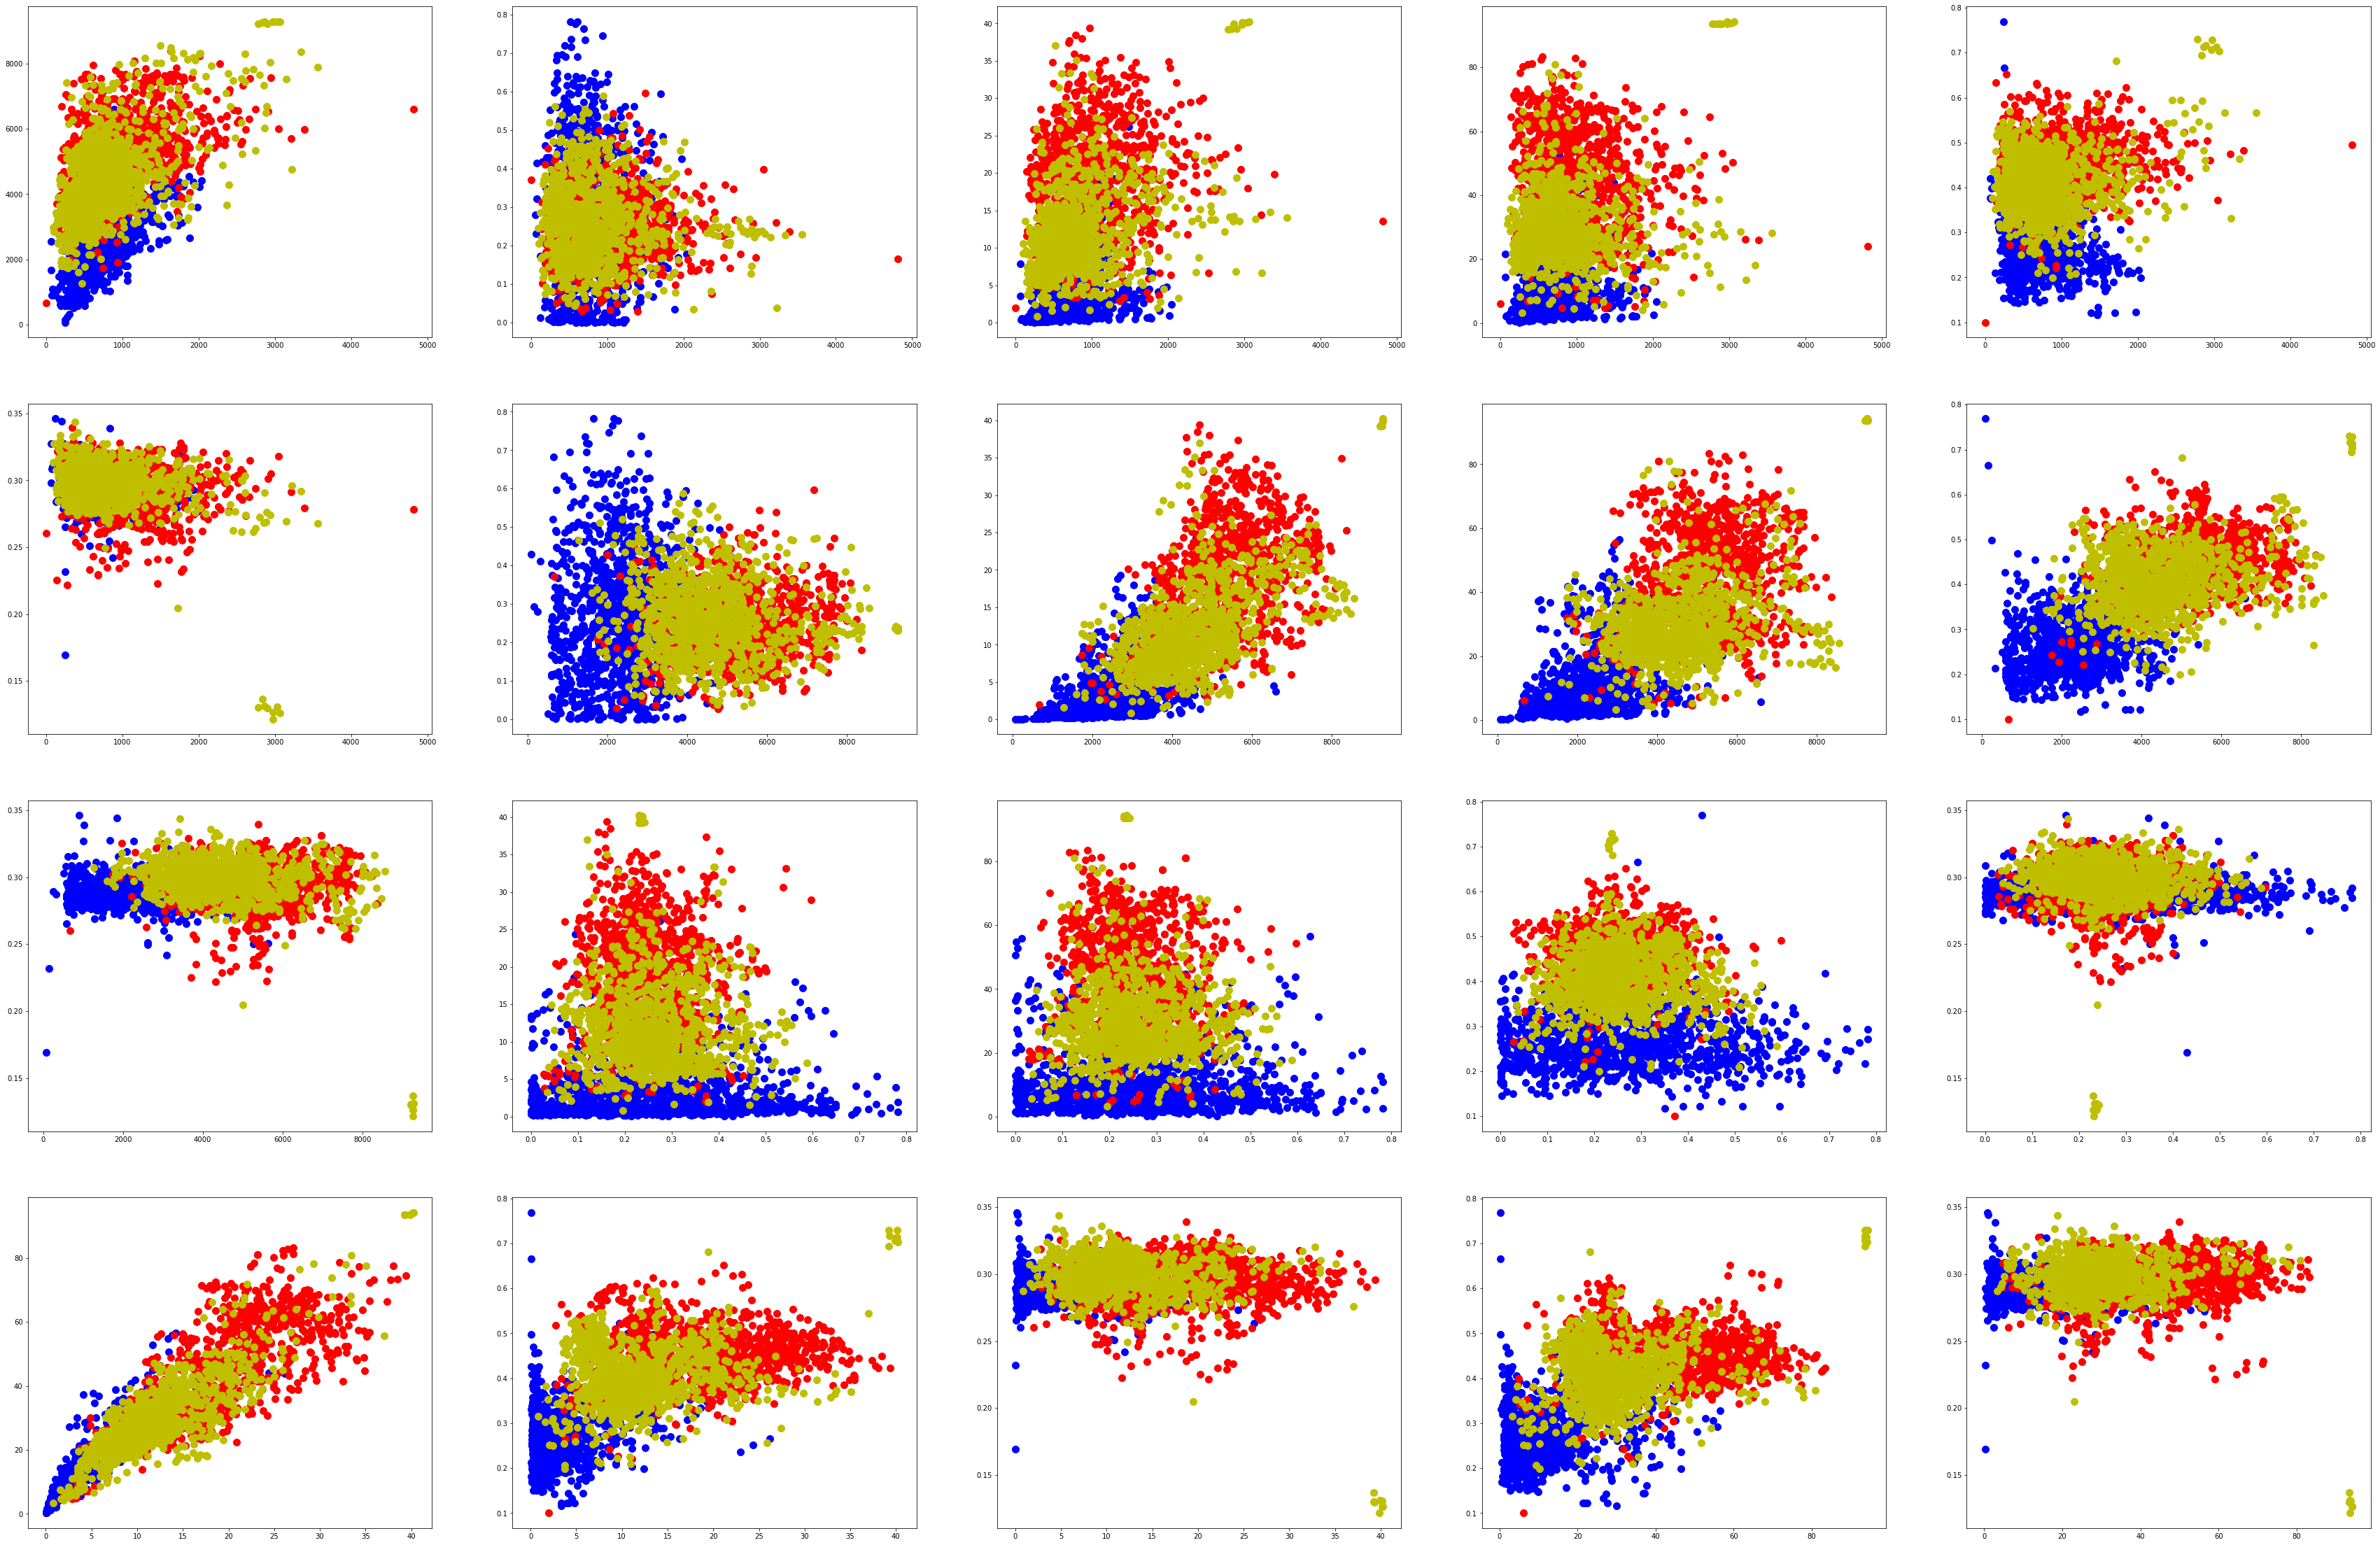

In [7]:
data_blues = dataframe[dataframe['class']==3]
data_rock = dataframe[dataframe['class']==4]
data_disco = dataframe[dataframe['class']==7]

#variable1 = 'fourier_std'
#variable2 = 'zerocrossing'

features_plot = features[0:-1]


i=0
plot_index = 0
second_index =-1
f = plt.figure()    
f, axs = plt.subplots(nrows = 4, ncols = 5, figsize=(60, 40))

for variable1 in features_plot:
    i=i+1
    print(variable1)
    for j in range(i,len(features_plot)):
        variable2 = features_plot[j]
        
        mod_index = plot_index % 5
        if mod_index ==0:
            second_index = second_index +1
        
        
        axs[second_index][plot_index % 5].scatter(data_blues[variable1],data_blues[variable2],c='b',s=100)
        axs[second_index][plot_index % 5].scatter(data_rock[variable1],data_rock[variable2],c='r',s=100)
        axs[second_index][plot_index % 5].scatter(data_disco[variable1],data_disco[variable2],c='y',s=100)
        #axs[plot_index][0].subtitle(variable1+' '+variable2)
        #plt.show()
        plot_index = plot_index + 1
    




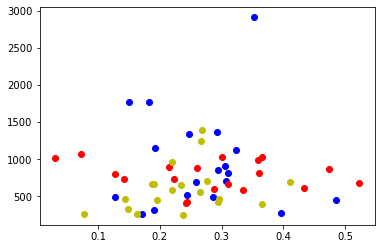

In [327]:
data_blues = dataframe[dataframe['class']==folders[0]]
data_rock = dataframe[dataframe['class']==folders[1]]
data_disco = dataframe[dataframe['class']==folders[2]]

variable1 = 'chroma_cens'
variable2 = 'zerocrossing'

        
plt.scatter(data_blues[variable1],data_blues[variable2],c='b')
plt.scatter(data_rock[variable1],data_rock[variable2],c='r')
plt.scatter(data_disco[variable1],data_disco[variable2],c='y')


In [8]:
dataframe['class_num'] = pd.factorize(dataframe['class'])[0]
df_1=[]
train_features = ['zerocrossing','spectralrolloff','chromagramstd','chromagrammean',
                  'fourier_std','fourier_mean','chroma_cens']
df_1=dataframe[train_features]

Y_1=dataframe['class_num']

#Scaling using the Standard Scaler
sc_1=StandardScaler()
sc_1.fit(df_1)
X_1=pd.DataFrame(sc_1.fit_transform(df_1))

X_train,X_test,y_train,y_test=train_test_split(X_1,Y_1,test_size=0.1,random_state=42)
d_train=lgb.Dataset(X_train, label=y_train)

params={}
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=10
params['num_class']=10
params['num_leaves']=14
params['force_col_wise']=True
params['verbose'] = 1
params['learning_rate']=0.2
epochs = 500
#len(os.listdir()) #no.of unique values in the target class not inclusive of the end value
#training the model
score_array=[]

evals_result={}
test = False

if test==True:
    for param in range(10):
        #params['max_depth']=param+1

        clf=lgb.train(params,d_train,param*100+1)

        y_pred_1=clf.predict(X_test)

        y_pred_m = [np.argmax(line) for line in y_pred_1]

        score = precision_score(y_pred_m,y_test,average=None).mean()
        score_array.append(score)
        plt.plot(score_array)
else:
    
    clf=lgb.train(params,d_train, epochs)

    y_pred_1=clf.predict(X_test)

    y_pred_m = [np.argmax(line) for line in y_pred_1]

    score = precision_score(y_pred_m,y_test,average=None).mean()

print(score)
print(np.array(y_pred_m))
print(np.array(y_test))
len(y_test)


[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 9899, number of used features: 7
[LightGBM] [Info] Start training from score -2.295438
[LightGBM] [Info] Start training from score -2.303495
[LightGBM] [Info] Start training from score -2.303495
[LightGBM] [Info] Start training from score -2.307547
[LightGBM] [Info] Start training from score -2.303495
[LightGBM] [Info] Start training from score -2.293434
[LightGBM] [Info] Start training from score -2.302484
[LightGBM] [Info] Start training from score -2.309580
[LightGBM] [Info] Start training from score -2.300466
[LightGBM] [Info] Start training from score -2.306533
0.5988124371496911
[0 5 6 ... 6 5 1]
[0 5 6 ... 4 5 1]


1100

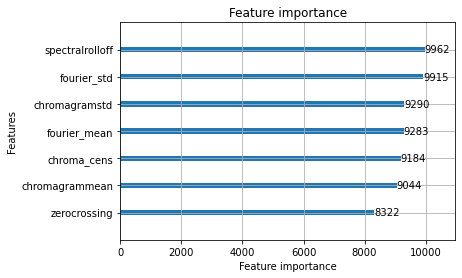

In [9]:
#######################Feature importance##############################################

axes = lgb.plot_importance(clf)

labels = [item.get_text() for item in axes.get_yticklabels()]

feature_imp_labels = []

for h in range(len(labels)):
    index = int(labels[h])
    feature_imp_labels.append(train_features[index])

axes.set_yticklabels(feature_imp_labels);

In [54]:
#kNeighbour cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

# cross_validate
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)

cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))



[0.575      0.5        0.55       0.5625     0.5625     0.525
 0.55       0.5625     0.5625     0.62025316] 

mean = 0.56


Length of list 30
Max of list 0.5570253164556962


Text(0, 0.5, 'Cross-validated accuracy')

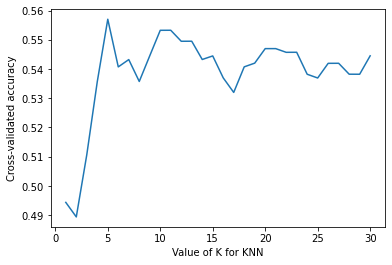

In [53]:

########################Find best n_neighbors##########################################

k_range = range(1, 31)
# empty list to store scores
k_scores = []


for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(cv_scores.mean())

print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
    

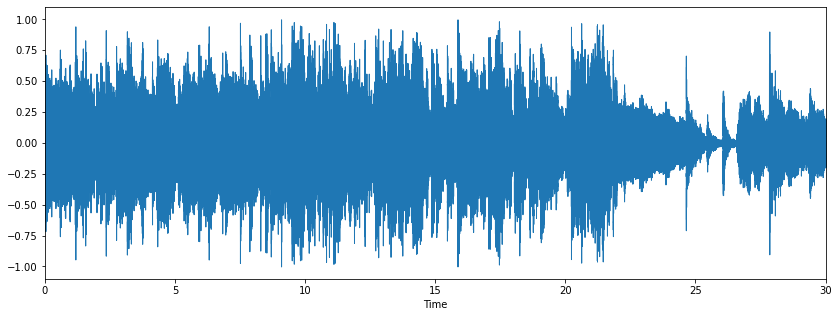

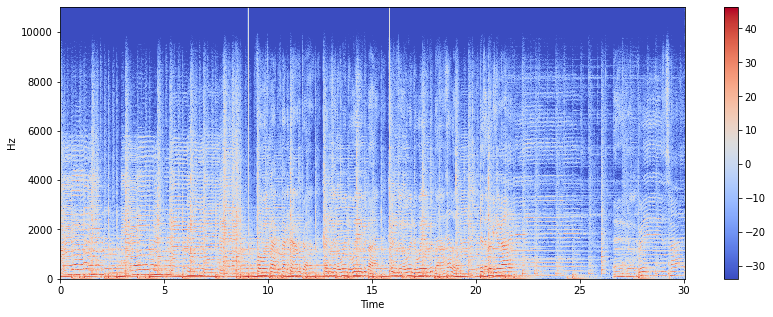

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [4]:
pip install python_speech_features

  Using cached python_speech_features-0.6-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [49]:

timbre_array = np.array([hardness, depth, brightness, roughness, warmth, sharpness, boominess, reverb])


os.chdir(r'C:\Users\HITLER\Dropbox\PhD\ML\BigProjectGithub\music')
         
DF = pd.DataFrame(timbre_array)
DF.to_csv("timbre_data.csv")

#dataframe['spectralrolloff'] = spectral_rolloff_data
#dataframe['chromagramstd'] = chromagram_std_data
#dataframe['chromagrammean'] = chromagram_mean_data
#dataframe['fourier_mean'] = fourier_mean
#dataframe['fourier_std'] = fourier_std
#dataframe['chroma_cens'] = chroma_cens_lib
#dataframe['class'] = classes

In [57]:
classes

[0]

In [65]:
pdread

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0,490.000000,704.000000,913.000000,849.000000,697.000000,268.000000,448.000000,1773.000000,322.000000,690.000000,462.000000,591.000000,256.000000,664.000000,666.000000,325.000000,456.000000,398.000000,840.000000,156.000000,623.000000,132.000000,623.000000,464.000000,719.000000,617.000000,756.000000,1073.000000,1022.000000,730.000000,1027.000000,820.000000,600.000000,1030.000000,800.000000,610.000000,1256.000000,657.000000,683.000000,655.000000,199.000000,1221.000000,369.000000,777.000000,1760.000000,1711.000000,1466.000000,1018.000000,1325.000000,1834.000000,1083.000000,1814.000000,1783.000000,1048.000000,716.000000,788.000000,1168.000000,603.000000,322.000000,667.000000,676.000000,299.000000,638.000000,1098.000000,724.000000,1127.000000,788.000000,695.000000,821.000000,644.000000,1204.000000,423.000000,728.000000,1580.000000,1442.000000,1452.000000,1526.000000,1546.000000,1158.000000,1091.000000,1356.000000,849.000000,1125.000000,868.000000,502.000000,688.000000,1303.000000,731.000000,1252.000000,1530.000000
1,1,7916.478436,8049.560283,7392.282121,3639.036502,5958.993877,4642.018185,4867.800887,4007.029798,6394.446791,2707.925099,2190.437631,1856.989157,1353.455005,1773.285903,2422.485352,2363.926355,1872.656476,2680.426167,3775.474414,3451.710890,3016.354120,2124.248824,3523.948629,3423.205189,2741.215032,2904.494621,3746.161634,2602.738564,2232.805123,2693.239588,2718.575215,3080.146650,2694.545891,2597.887769,2517.545957,2823.595342,5494.716401,5504.526895,3060.890783,5111.009686,4991.554450,5786.553658,6026.420239,4531.766522,5724.012966,6380.288086,6002.733715,4428.723079,5240.691116,6854.351114,4944.414194,6170.692700,5757.745724,6121.049937,4185.836693,3231.652870,3883.706217,3002.367523,2909.586708,2855.737059,3236.952967,2643.525179,3347.331434,4729.333741,3493.878693,3836.163434,4067.062939,4215.607095,3729.903566,2821.781495,3690.023874,3575.676575,4853.341964,6509.555061,8050.830323,6198.264919,7151.486277,5455.773365,5496.029514,6073.444934,5431.883000,6205.220490,6266.669654,5149.057338,4334.588859,6332.267712,6163.189440,6007.203512,6386.759704,5468.711393
2,2,0.286046,0.306736,0.306183,0.293715,0.258193,0.171800,0.484859,0.149429,0.190629,0.411155,0.295319,0.219574,0.076654,0.186737,0.190803,0.149273,0.195756,0.365350,0.287203,0.254837,0.182833,0.151099,0.216383,0.202559,0.332446,0.178372,0.346071,0.071743,0.030240,0.142370,0.301212,0.359849,0.286934,0.365622,0.127373,0.433015,0.253599,0.204132,0.259380,0.387929,0.115916,0.180288,0.222800,0.253605,0.166759,0.320089,0.240400,0.224297,0.254708,0.244381,0.255937,0.220470,0.259143,0.266905,0.226411,0.162553,0.366443,0.210360,0.328480,0.389607,0.206091,0.317574,0.213110,0.187242,0.326285,0.273768,0.171666,0.234935,0.402058,0.213535,0.252774,0.234450,0.182457,0.287268,0.265180,0.303733,0.262084,0.285281,0.268339,0.331968,0.278924,0.108625,0.199020,0.184400,0.206834,0.233845,0.299729,0.222930,0.193409,0.186363
3,3,61.724392,98.570839,71.167252,44.226902,89.199371,61.493546,29.073046,31.818287,79.735458,22.031666,8.390878,24.549543,13.496294,24.148396,33.885124,29.445177,26.330217,31.507824,47.738117,31.858900,62.445969,29.406216,41.640102,50.647919,62.760902,54.905628,42.910156,10.982121,7.367671,12.861226,8.886698,14.019201,14.267823,9.609757,13.369732,11.172924,61.864143,94.177780,27.736347,103.686066,65.956871,100.601372,101.520401,87.141228,63.159813,55.286968,42.527981,57.609028,69.079002,30.762970,49.709557,25.475618,29.909607,24.722223,51.106689,51.577148,58.851780,44.715405,50.863934,68.195045,66.128304,43.223869,89.427200,36.600304,23.331879,31.056454,29.544144,36.226448,35.475933,27.273035,29.647020,32.855747,51.122726,91.079788,64.992500,83.008827,53.973965,91.588432,85.401314,68.674744,

In [67]:
dataframe

,zerocrossing_data,spectral_rolloff_data,chroma_cens_lib,fourier_mean,fourier_std,chromagram_mean_data,chromagram_std_data,classes
0,490.0,7916.478436,0.286046,61.724392,155.002121,0.389286,0.301558,0.0
1,704.0,8049.560283,0.306736,98.570839,213.782852,0.413187,0.312815,0.0
2,913.0,7392.282121,0.306183,71.167252,173.006790,0.417412,0.305931,0.0
3,849.0,3639.036502,0.293715,44.226902,101.596466,0.407685,0.284466,0.0
4,697.0,5958.993877,0.258193,89.199371,152.478058,0.384264,0.289209,0.0
...,...,...,...,...,...,...,...,...
84,502.0,4334.588859,0.206834,73.711708,153.167160,0.376894,0.289379,9.0
85,688.0,6332.267712,0.233845,77.757599,153.351547,0.383168,0.286070,9.0
86,1303.0,6163.189440,0.299729,82.609123,147.878983,0.416045,0.288013,9.0
87,731.0,6007.203512,0.222930,83.364342,157.423706,0.421576,0.282165,9.0


['zerocrossing_data',
 'spectral_rolloff_data',
 'chroma_cens_lib',
 'fourier_mean',
 'fourier_std',
 'chromagram_mean_data',
 'chromagram_std_data',
 'classes']